# DS-IQ-001

In [22]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [23]:
#importing the dataset
data= pd.read_csv ("C:/Users/Suwetha/Documents/Curneu Assessment/Dataset/medical-records-10-yrs/encounter_dx.csv")
data1= pd.read_csv ("C:/Users/Suwetha/Documents/Curneu Assessment/Dataset/medical-records-10-yrs/encounter.csv")
data2= pd.read_csv ("C:/Users/Suwetha/Documents/Curneu Assessment/Dataset/medical-records-10-yrs/lab_results.csv")
data3= pd.read_csv ("C:/Users/Suwetha/Documents/Curneu Assessment/Dataset/medical-records-10-yrs/medication_fulfillment.csv")

In [24]:
#Printing data
print (data)
print (data1)
print (data2)
print (data3)

                         Provider_Org   code vocab  \
0     ExactData Medical Health System  401.9  ICD9   
1     ExactData Medical Health System  V70.0  ICD9   
2     ExactData Medical Health System    496  ICD9   
3     ExactData Medical Health System  401.9  ICD9   
4     ExactData Medical Health System  V70.0  ICD9   
...                               ...    ...   ...   
3058  ExactData Medical Health System  584.9  ICD9   
3059  ExactData Medical Health System    250  ICD9   
3060  ExactData Medical Health System  V70.0  ICD9   
3061  ExactData Medical Health System  590.8  ICD9   
3062  ExactData Medical Health System  590.8  ICD9   

                                description  severity          Encounter_ID  
0                              Hypertension      mild  L8694502508698944760  
1               General medical examination       NaN  M3204724885018391695  
2     Chronic Obstructive Pulmonary Disease  critical  C2819614934032019919  
3                              Hyperten

In [25]:
data1['Clinic_ID'].value_counts() #Counts of unique category present in cLinic_ID feature

Advocate Medical Group             302
Community Health Clinic            280
Corner Drug Store                  212
Riverside Medical Associates       151
Ulnacs Medical Care GO Okoji MD    148
                                  ... 
Beaches Medical Center               1
Dignity Women's Center               1
Bethune Medical Care                 1
General Hospital                     1
Guthrie Medical Group                1
Name: Clinic_ID, Length: 99, dtype: int64

In [26]:
data.head()

,Provider_Org,code,vocab,description,severity,Encounter_ID
0,ExactData Medical Health System,401.9,ICD9,Hypertension,mild,L8694502508698944760
1,ExactData Medical Health System,V70.0,ICD9,General medical examination,NaN,M3204724885018391695
2,ExactData Medical Health System,496,ICD9,Chronic Obstructive Pulmonary Disease,critical,C2819614934032019919
3,ExactData Medical Health System,401.9,ICD9,Hypertension,mild,S4571692645992867370
4,ExactData Medical Health System,V70.0,ICD9,General medical examination,NaN,J6262874375300991101


In [27]:
data.shape #Shape of the dataset

(3063, 6)

In [28]:
data.describe() #describing the dataset

,Provider_Org,code,vocab,description,severity,Encounter_ID
count,3063,3063,3063,3063,2367,3063
unique,1,23,1,25,5,2717
top,ExactData Medical Health System,V70.0,ICD9,General medical examination,severe,W1173554279042761266
freq,3063,582,3063,582,924,2


In [29]:
data.info() #info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3063 entries, 0 to 3062
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Provider_Org  3063 non-null   object
 1   code          3063 non-null   object
 2   vocab         3063 non-null   object
 3   description   3063 non-null   object
 4   severity      2367 non-null   object
 5   Encounter_ID  3063 non-null   object
dtypes: object(6)
memory usage: 143.7+ KB


In [30]:
#Checking for unique values for severity attribute
data['severity'].unique()

array(['mild', nan, 'critical', 'severe', 'moderate', 'asymptomatic'],
      dtype=object)

In [31]:
data['description'].value_counts() #Counts of unique category present in description feature

General medical examination                 582
Type 1 Diabetes                             549
Chronic Obstructive Pulmonary Disease       464
Type 2 Diabetes                             182
Pyelonephritis                              177
Acute Renal Failure                         176
Hemorrhagic Stroke                          170
Embolic Stroke                              115
Hypertension                                112
Care involving other physical therapy       107
Chronic Renal Failure                        91
Chronic Congestive Heart Failure             91
Myocardial Infarction                        72
Left foot amputation status                  56
Disarticulation of right shoulder status     38
Disarticulation of right hip status          36
Kidney Stones                                30
Routine infant or child health check          6
critical agony                                2
Open wound of left foot                       2
critical hysteria                       

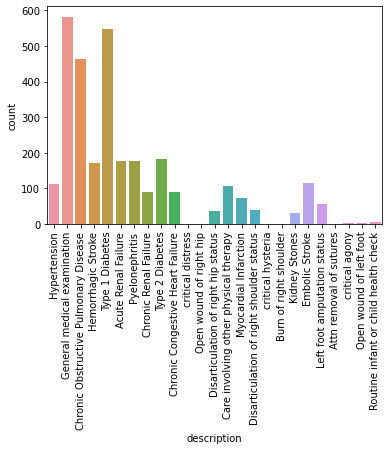

In [32]:
#Visualizing Description using Countplot
sns.countplot(data['description'])
plt.xticks(rotation=90)
plt.show()

In [33]:
# using merge function by setting how='left'
output = pd.merge(data, data1, on='Encounter_ID',how='inner')
op1 = pd.DataFrame(output)
op1.head(5)


,Provider_Org_x,code,vocab,description,severity,Encounter_ID,Provider_Org_y,Member_ID,Provider_ID,Provider_NPI,...,medication_orders_count,medication_fulfillment_count,vital_sign_count,therapy_orders_count,therapy_actions_count,immunization_count,Has_Appt,SOAP_Note,consult_ordered,Disposition
0,ExactData Medical Health System,401.9,ICD9,Hypertension,mild,L8694502508698944760,ExactData Medical Health System,568001602-01,663746638,2531462832,...,1,0,7,0,1,0,True,s:a 33 year old female crystallographer presen...,NaN,ReleasedWithoutLimitations
1,ExactData Medical Health System,V70.0,ICD9,General medical examination,NaN,M3204724885018391695,ExactData Medical Health System,568001602-01,663746638,2531462832,...,0,0,7,0,1,1,True,s:33 yr old female crystallographer presents t...,NaN,ReleasedWithoutLimitations
2,ExactData Medical Health System,496,ICD9,Chronic Obstructive Pulmonary Disease,critical,C2819614934032019919,ExactData Medical Health System,937650000-01,581395544,2463742680,...,0,1,7,0,1,0,True,s:a 32 year old f presents with critical dyspn...,NaN,ReleasedWithoutLimitations
3,ExactData Medical Health System,401.9,ICD9,Hypertension,mild,S4571692645992867370,ExactData Medical Health System,937650000-01,135055397,1032122911,...,1,0,7,0,1,0,True,s:a white female aged 32 Ys presents with 8 mo...,NaN,ReleasedWithoutLimitations
4,ExactData Medical Health System,V70.0,ICD9,General medical examination,NaN,J6262874375300991101,ExactData Medical Health System,937650000-01,135055397,1032122911,...,0,0,7,0,1,1,True,s:32 yr old white F presents today for routine...,NaN,ReleasedWithoutLimitations


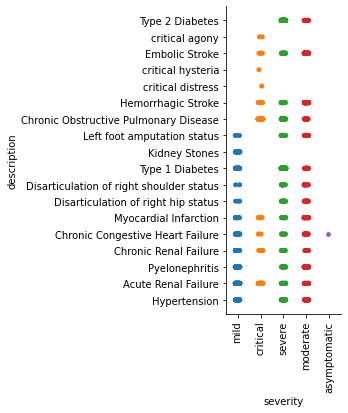

In [34]:
#Visualizing catplot to know more about the data
sns.catplot(x="severity", y="description", data=op1)
plt.xticks(rotation=90)
plt.show()

In [35]:
#Check for correlation
cor=op1.corr()
print (cor)

                              Provider_ID  Provider_NPI  Facility_Name  \
Provider_ID                      1.000000      0.236163            NaN   
Provider_NPI                     0.236163      1.000000            NaN   
Facility_Name                         NaN           NaN            NaN   
lab_orders_count                -0.005728      0.096354            NaN   
lab_results_count                0.054885      0.134202            NaN   
medication_orders_count         -0.033510     -0.018731            NaN   
medication_fulfillment_count     0.118517      0.026136            NaN   
vital_sign_count                 0.005509      0.195934            NaN   
therapy_orders_count             0.101240     -0.034622            NaN   
therapy_actions_count           -0.031595     -0.071313            NaN   
immunization_count               0.010659      0.104398            NaN   
Has_Appt                              NaN           NaN            NaN   

                              lab_ord

<AxesSubplot:>

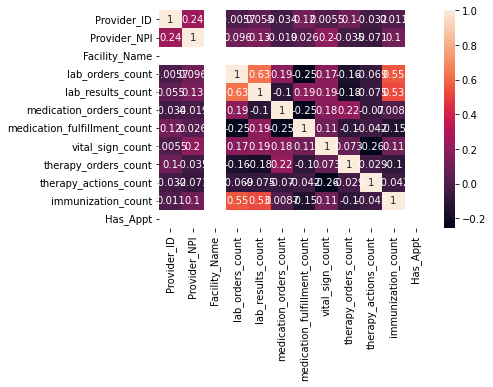

In [36]:
sns.heatmap(cor,annot=True)

In [37]:
op1.isnull().sum() #null values

Provider_Org_x                     0
code                               0
vocab                              0
description                        0
severity                         696
Encounter_ID                       0
Provider_Org_y                     0
Member_ID                          0
Provider_ID                        0
Provider_NPI                       0
Clinic_ID                          0
Encounter_DateTime                 0
Encounter_Description              0
CC                               540
Episode_ID                         0
Patient_DOB                        0
Patient_Gender                     0
Facility_Name                   3059
Provider_Name                      0
Specialty                          0
Clinic_Type                        0
lab_orders_count                   0
lab_results_count                  0
medication_orders_count            0
medication_fulfillment_count       0
vital_sign_count                   0
therapy_orders_count               0
t

In [38]:
op1.dtypes #datatypes

Provider_Org_x                   object
code                             object
vocab                            object
description                      object
severity                         object
Encounter_ID                     object
Provider_Org_y                   object
Member_ID                        object
Provider_ID                       int64
Provider_NPI                      int64
Clinic_ID                        object
Encounter_DateTime               object
Encounter_Description            object
CC                               object
Episode_ID                       object
Patient_DOB                      object
Patient_Gender                   object
Facility_Name                   float64
Provider_Name                    object
Specialty                        object
Clinic_Type                      object
lab_orders_count                  int64
lab_results_count                 int64
medication_orders_count           int64
medication_fulfillment_count      int64


In [39]:
# Droping unnecessary features
op1=op1.drop(['Facility_Name'],axis=1)

In [40]:
op1=op1.drop(['Provider_Org_x'],axis=1)

In [41]:
op1.replace([np.inf, -np.inf], np.nan, inplace=True)
  
# Dropping all the rows with nan values
op1.dropna(inplace=True)

In [42]:
#op1=op1.dropna()

In [43]:
op1.isnull().sum()

code                            0
vocab                           0
description                     0
severity                        0
Encounter_ID                    0
Provider_Org_y                  0
Member_ID                       0
Provider_ID                     0
Provider_NPI                    0
Clinic_ID                       0
Encounter_DateTime              0
Encounter_Description           0
CC                              0
Episode_ID                      0
Patient_DOB                     0
Patient_Gender                  0
Provider_Name                   0
Specialty                       0
Clinic_Type                     0
lab_orders_count                0
lab_results_count               0
medication_orders_count         0
medication_fulfillment_count    0
vital_sign_count                0
therapy_orders_count            0
therapy_actions_count           0
immunization_count              0
Has_Appt                        0
SOAP_Note                       0
consult_ordere

In [44]:
#Encoding using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
cat_data=op1.select_dtypes(include=np.object)
cat_data=pd.DataFrame(oe.fit_transform(cat_data),columns=cat_data.columns)

In [45]:
#Standardizing the numerical data
from sklearn.preprocessing import StandardScaler

In [46]:
sc=StandardScaler()
num_data=op1.select_dtypes(include=np.number)
num_data=pd.DataFrame(sc.fit_transform(num_data),columns=num_data.columns)

In [47]:
#Creating the Final dataframe after encoding and standardization
final=pd.concat([num_data,cat_data],axis=1)
final.head()

,Provider_ID,Provider_NPI,lab_orders_count,lab_results_count,medication_orders_count,medication_fulfillment_count,vital_sign_count,therapy_orders_count,therapy_actions_count,immunization_count,...,CC,Episode_ID,Patient_DOB,Patient_Gender,Provider_Name,Specialty,Clinic_Type,SOAP_Note,consult_ordered,Disposition
0,0.735497,0.845310,2.045852,2.359214,-0.164083,0.0,0.0,-0.181334,0.0,-0.255264,...,42.0,221.0,44.0,0.0,8.0,0.0,0.0,75.0,3.0,1.0
1,-0.512010,0.180994,-0.390555,-0.415720,-0.164083,0.0,0.0,-0.181334,0.0,-0.255264,...,45.0,455.0,23.0,1.0,5.0,0.0,0.0,11.0,1.0,1.0
2,1.557839,0.235499,-0.390555,-0.415720,-0.164083,0.0,0.0,-0.181334,0.0,-0.255264,...,8.0,373.0,72.0,0.0,6.0,0.0,0.0,420.0,3.0,1.0
3,-0.087104,0.247538,-0.390555,-0.415720,-0.164083,0.0,0.0,-0.181334,0.0,-0.255264,...,8.0,183.0,56.0,1.0,9.0,0.0,0.0,384.0,3.0,1.0
4,-1.680933,-2.534667,-0.390555,-0.415720,-0.164083,0.0,0.0,-0.181334,0.0,-0.255264,...,8.0,97.0,9.0,0.0,13.0,0.0,0.0,125.0,3.0,1.0


In [48]:
final.dtypes #checking final dataframe's datatypes

Provider_ID                     float64
Provider_NPI                    float64
lab_orders_count                float64
lab_results_count               float64
medication_orders_count         float64
medication_fulfillment_count    float64
vital_sign_count                float64
therapy_orders_count            float64
therapy_actions_count           float64
immunization_count              float64
code                            float64
vocab                           float64
description                     float64
severity                        float64
Encounter_ID                    float64
Provider_Org_y                  float64
Member_ID                       float64
Clinic_ID                       float64
Encounter_DateTime              float64
Encounter_Description           float64
CC                              float64
Episode_ID                      float64
Patient_DOB                     float64
Patient_Gender                  float64
Provider_Name                   float64


In [49]:
#Checking for infinite values
np.all(np.isfinite(final))

True

In [50]:
#Implementing Principal Component Analysis
from sklearn.decomposition import PCA
pca= PCA(n_components=8)
principalComponents = pca.fit_transform(final)

In [51]:
pca2 = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5','principal component 6','principal component 7','principal component 8'])

In [52]:
pca2.tail()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8
529,-123.274783,69.103055,-115.201915,-318.711387,66.264357,21.215103,89.298120,12.706503
530,-233.162568,-316.487403,-149.932433,31.013960,57.101072,8.540963,-45.638179,26.925400
531,-89.039425,68.159257,-116.592137,-325.899273,67.620096,25.206816,120.473956,-7.097061
532,-71.147163,74.229761,-113.647872,-322.822492,70.261514,26.098383,139.511848,8.437632
533,-103.491263,-364.747884,59.717388,-157.202112,1.190731,51.490208,-6.488138,-3.216368


In [65]:
#Plotting ELbow graph
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

In [66]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(pca2)
    kmeanModel.fit(pca2)
 
    distortions.append(sum(np.min(cdist(pca2, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / pca2.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(pca2, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / pca2.shape[0]
    mapping2[k] = kmeanModel.inertia_

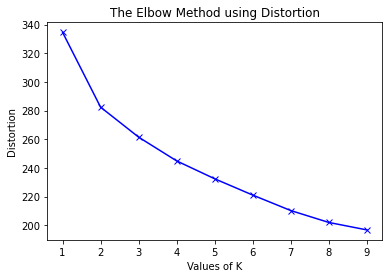

In [67]:
#visualizing graph
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [61]:
#Fitting Kmeans Model
from sklearn.cluster import KMeans
kmeans = KMeans(4)
kmeans.fit(pca2)

KMeans(n_clusters=4)

In [62]:
identified_clusters = kmeans.fit_predict(pca2)
identified_clusters

array([2, 2, 1, 3, 3, 1, 1, 3, 2, 3, 3, 2, 2, 1, 1, 2, 3, 2, 2, 2, 1, 3,
       3, 2, 2, 1, 1, 2, 0, 3, 1, 2, 3, 3, 2, 3, 3, 2, 2, 3, 2, 2, 1, 3,
       1, 3, 3, 3, 1, 2, 3, 2, 2, 2, 2, 1, 0, 2, 0, 1, 3, 0, 3, 3, 2, 3,
       3, 3, 0, 2, 1, 2, 2, 0, 3, 3, 2, 3, 1, 1, 2, 2, 2, 0, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 0, 3, 3, 3, 3, 2, 3, 3, 1, 3, 3, 3, 0, 1, 2, 3, 1,
       1, 1, 3, 0, 3, 2, 3, 2, 1, 1, 3, 2, 0, 2, 1, 0, 0, 0, 3, 1, 0, 3,
       0, 2, 1, 3, 0, 3, 1, 0, 0, 3, 3, 0, 2, 1, 0, 1, 3, 0, 3, 3, 2, 2,
       0, 1, 2, 2, 2, 3, 0, 0, 1, 2, 1, 2, 1, 0, 3, 1, 2, 3, 0, 0, 2, 1,
       3, 2, 0, 0, 2, 2, 3, 3, 3, 1, 0, 3, 3, 2, 1, 3, 1, 0, 1, 3, 3, 1,
       3, 0, 3, 1, 2, 0, 3, 2, 1, 1, 0, 1, 2, 0, 0, 1, 3, 0, 1, 0, 1, 0,
       1, 3, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 1, 2, 1, 0, 2, 1, 2, 1, 1, 0,
       1, 3, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 3, 0, 0, 3, 2, 2, 0, 2,
       2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 1, 1, 1, 1, 0, 1, 3, 2, 2,
       3, 0, 2, 0, 0, 2, 1, 0, 0, 1, 0, 0, 1, 0, 0,

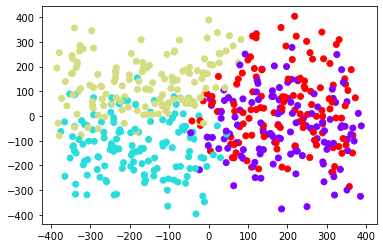

In [63]:
#visualizing the clusters 
data_with_clusters = pca2.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['principal component 1'],data_with_clusters['principal component 2'],c=data_with_clusters['Clusters'],cmap='rainbow')